# 聚类算法
> <p> 博客地址:  https://xingyublog.netlify.app/ </p>
> <p>模式识别 课程 学习代码 </p>
> <p>Email：a940858626@qq.com</p>

##  1.1 距离函数

In [1]:
import numpy as np

In [2]:
def distance(X1, X2, types = 'Euclidean'):
    # 欧式距离 Euclidean Distance
    if types == 'Euclidean':
        X1 = np.array(X1)
        X2 = np.array(X2)
        distance = np.sqrt(np.dot( (X1 - X2).T, (X1 - X2) ))
    return distance 

In [3]:
# 测试 distance
print(distance(np.array([1,1]), np.array([2,2])))

1.4142135623730951


## 1.2 基于距离阈值的聚类算法
### 1.2.1 近邻聚类算法

#### 导入数据

In [4]:

M = np.array([[170, 180, 190, 150, 190, 210, 170, 140, 150, 130], 
              [68, 71, 73, 66, 68, 76, 75, 62, 66, 66]])
F = np.array([[130, 160, 100, 150, 120],
              [66, 70, 58, 64, 66]])
data = np.vstack((M.T, F.T))
data.shape, M.T.shape, F.T.shape

((15, 2), (10, 2), (5, 2))

#### 绘制数据散点图

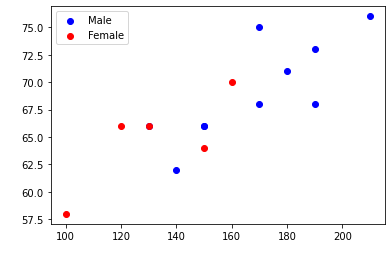

In [5]:
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})
plt.scatter(M[0], M[1], color = 'blue', label= 'Male')
plt.scatter(F[0], F[1], color = 'RED', label= 'Female')
plt.legend(["Male","Female"])
plt.xlabel('Heigh', color = 'white')
plt.ylabel('Weight', color = 'white')
plt.show()

#### 初始化聚类变量

In [6]:
# m 样本数量
m = data.shape[0]
# 设置工作结构数组 变量 pattern
'''
pattern = {}
pattern['feature'] = np.array(data)
pattern['classno'] = np.zeros((m,1))
'''
pattern = [{}] * m
for i in range(0, m):
    tmp = {'feature': np.array(data[i,:]),
           'classno': 0}
    pattern[i] = tmp

In [7]:
#随机选取一个样本号
import random
s = np.random.randint(0, m)
# 设置聚类中心结构数组 变量 Z
Z = [{}] * m 

Z[0] = ({'feature': pattern[s]['feature'], # 将随机选取的样本作为第一个聚类中心代表
        'id': 1,     #中心代表的类标号
        'patternNum': 1})  #类中样本个数
pattern[s]['classno'] =  1 # 模式分类标号
classNum = 0     #类数初值
# 阈值
T = 40
for i in range(0, m):
    mindis = np.inf
    index = 1   #记录最小距离的类号
    for j in range(0, classNum):
        dis = distance(pattern[i]['feature'], Z[j]['feature'])
        if dis < mindis:
            mindis = dis
            index = j
    if mindis < T:   #不需要新建类
        pattern[i]['classno'] = Z[index]['id']
        n = Z[index]['patternNum']
        Z[index]['patternNum'] = n + 1
        tempmean = Z[index]['feature']
        Z[index]['feature'] = (n * tempmean + pattern[i]['feature']) / (n + 1) # 计算类新增均值向量
    else:
        classNum += 1
        pattern[i]['classno'] = classNum
        Z[classNum-1]['feature'] = pattern[i]['feature']
        Z[classNum-1]['id'] = classNum
        Z[classNum-1]['patternNum'] = 1
    


In [8]:
# 将得到数据转化成pandas 然后绘图
import pandas as pd
df = pd.DataFrame(pattern)
df['heigh'] = [x[0] for x in df['feature']]
df['weight'] = [x[1] for x in df['feature']]
df.head()

,feature,classno,heigh,weight
0,"[170, 68]",1,170,68
1,"[180, 71]",1,180,71
2,"[190, 73]",1,190,73
3,"[150, 66]",1,150,66
4,"[190, 68]",1,190,68


In [9]:


'''
import seaborn as sns

g = sns.relplot(
    data=df,
    x='heigh', y='weight',
    hue="classno",
    sizes=(10, 200),
)
g.set(xlim=(df['heigh'].min(), df['heigh'].max()))
g.add_legend()
'''

'\nimport seaborn as sns\n\ng = sns.relplot(\n    data=df,\n    x=\'heigh\', y=\'weight\',\n    hue="classno",\n    sizes=(10, 200),\n)\ng.set(xlim=(df[\'heigh\'].min(), df[\'heigh\'].max()))\ng.add_legend()\n'

#### 绘制原始图像和聚类后图像

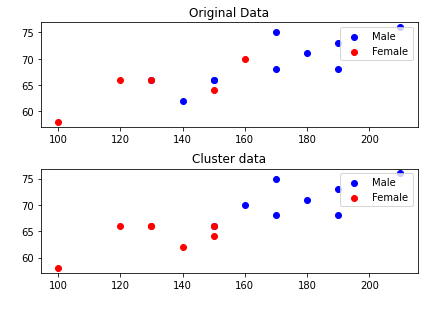

In [10]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})
plt.subplot(2,  1,  1)  
plt.scatter(M[0], M[1], color = 'blue', label= 'Male')
plt.scatter(F[0], F[1], color = 'RED', label= 'Female')
plt.legend(["Male","Female"])
plt.xlabel('Heigh', color = 'white')
plt.ylabel('Weight', color = 'white')
plt.title('Original Data')
plt.tight_layout() #设置默认的间距
plt.subplot(2,  1,  2)  
plt.scatter(df[df['classno']==1]['heigh'], df[df['classno']==1]['weight'], color = 'blue', label = 'Male')
plt.scatter(df[df['classno']==2]['heigh'], df[df['classno']==2]['weight'], color = 'red', label = 'Female')
plt.legend(["Male","Female"])
plt.xlabel('Heigh', color = 'white')
plt.ylabel('Weight', color = 'white')
plt.title('Cluster data')
plt.show()

In [11]:
# 最终结构

class Nearest_neighbor(object):
    def __init__(self, X, types = 'Euclidean', T = 2.5):
        self.X = np.array(X)
        self.m = self.X.shape[0]
        self.dist_type = types
        self.pattern = [{}] * self.m
        self.T = T
        for i in range(0, self.m):
            tmp = {'feature': np.array(self.X[i,:]),
                   'classno': 0}
            self.pattern[i] = tmp
        self.Z = [None] * self.m
    def distance(self, X1, X2):
        # 欧式距离 Euclidean Distance
        if self.dist_type == 'Euclidean':
            X1 = np.array(X1)
            X2 = np.array(X2)
            distance = np.sqrt(np.dot( (X1 - X2).T, (X1 - X2) ))
        return distance 
    def cluster(self):
        s = np.random.randint(0, self.m)
        # 设置聚类中心结构数组 变量 Z
        self.Z[0] = {'feature': self.pattern[s]['feature'], # 将随机选取的样本作为第一个聚类中心代表
                'id': 1,     #中心代表的类标号
                'patternNum': 1} #类中样本个数
        self.pattern[s]['classno'] =  1 # 模式分类标号
        classNum = 0     #类数初值
        # 阈值
        for i in range(0, self.m):
            mindis = np.inf
            index = 1   #记录最小距离的类号
            for j in range(0, classNum):
                dis = self.distance(self.pattern[i]['feature'], self.Z[j]['feature'])
                if dis < mindis:
                    mindis = dis
                    index = j
            if mindis < self.T:   #不需要新建类
                self.pattern[i]['classno'] = self.Z[index]['id']
                n = self.Z[index]['patternNum']
                self.Z[index]['patternNum'] = n + 1
                tempmean = self.Z[index]['feature']
                self.Z[index]['feature'] = (n * tempmean + self.pattern[i]['feature']) / (n + 1) # 计算类新增均值向量
            else:
                classNum += 1
                self.pattern[i]['classno'] = classNum
                temp = {'feature':self.pattern[i]['feature'], 'id': classNum, 'patternNum': 1}
                self.Z[classNum-1] = temp
        cluster_result={'pattern': self.pattern,
                        'Z' : self.Z}
        return cluster_result

#### 测试聚类算法

In [12]:
sample = np.array([[1,3,3,2,5,4,6,5],
          [2,7,2,1,3,7,4,5]])
sample = sample.T
sample.shape

(8, 2)

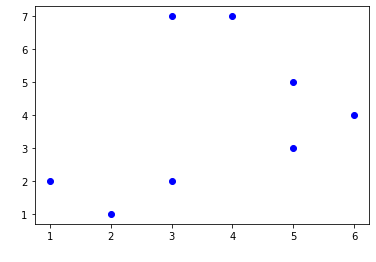

In [13]:
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})
plt.scatter([x[0] for x in sample],[x[1] for x in sample], color = 'blue')
plt.xlabel('Heigh', color = 'white')
plt.ylabel('Weight', color = 'white')
plt.show()

In [14]:

test = Nearest_neighbor(sample, T=2.5)
result = test.cluster()
for i in result['Z']:
    if(i):
        print(i)
        print('\n')

{'feature': array([2.        , 1.66666667]), 'id': 1, 'patternNum': 3}


{'feature': array([3.5, 7. ]), 'id': 2, 'patternNum': 2}


{'feature': array([5.33333333, 4.        ]), 'id': 3, 'patternNum': 3}




### 1.3 K_Means 算法

#### 导入数据

#### 初始化参数


In [38]:
class K_Means(object):
    def __init__(self, X, K, T = 2.5, types = 'Euclidean'):
        self.types = types
        self.m, self.nv = X.shape   # 获取样本个数和样本数
        self.K = K # 定义类数
        self.kclass =[{i} for i in random.sample(range(0, self.m), K)]
        self.Z = np.zeros((K,self.nv)) 
        self.Z_new = np.zeros((K,self.nv))
        self.D = np.empty((self.m,self.K))
        self.pattern = [{None}] * self.m
        self.value = {}   # #初始化类样本的坐标
        self.data = X
    def distance(self, X1, X2):
        # 欧式距离 Euclidean Distance
        if self.types == 'Euclidean':
            X1 = np.array(X1)
            X2 = np.array(X2)
            distance = np.sqrt(np.dot( (X1 - X2).T, (X1 - X2) ))
        return distance 
    def claster(self):
        i = 0
        print(self.kclass)
        for j in self.kclass:
            j = list(j)[0]
            self.Z[i] = self.data[j]
            if i<self.K:
                i +=1 
            else:
                break
        for i in range(self.K):
            self.value['w'+str(i)] = self.Z[i]
        n = 1
        while True:
            for j in range(self.m):
                for i in range(self.K):
                    self.D[j,i] = self.distance(self.data[j,:],self.Z[i,:])
                idx = np.argmin(self.D[j])
                self.kclass[idx].add(j)
                self.value['w'+str(idx)] = np.vstack((self.value['w'+str(idx)],self.data[j,:]))
            for j in range(self.K):
                self.Z_new[j] = np.mean(self.value['w'+str(j)], axis=0)
            if((self.Z == self.Z_new).any()):
                break
            else:
                self.Z = self.Z_new
                n += 1
                
        # 输出结果
        for j in range(self.K):
            print("第%d个聚类中心"%(j+1))
            print(self.Z_new[j])
        print("显示K-Means聚类结果和每个聚类中含的样本: \n")
        
        for i in range(self.m):
            tmp = {'feature':self.data[i,:]}
            self.pattern[i] = tmp
        for j in range(self.K):
            r = len(self.kclass[j])
            for p in range(r):
                self.pattern[list(self.kclass[j])[p]]['classno'] = j
        
        print('显示每个样本的特征及类号:\n')
        res = []
        for i in range(self.m):
            #print('%d-th sample:'%(i))
            #print(self.pattern[i]['feature'])
            #print('its classno: %d \n'%(self.pattern[i]['classno']))
            res.append(self.pattern[i]['classno'])
        print(res)
        result = {}
        result = {'Z': self.Z, 'value': self.value, 'pattern':self.pattern}
        return result
    def plot_result(self):
        plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})
        pattern_df = pd.DataFrame(self.pattern)
        pattern_df['x'] = [x[0] for x in pattern_df['feature']]
        pattern_df['y'] = [x[1] for x in pattern_df['feature']]
        plt.subplot(2,  1,  1) 
        plt.scatter([x[0] for x in self.data],[x[1] for x in self.data], color = 'blue')
        plt.subplot(2,  1,  2)
        colors = "bgrcmykw"
        marker = 'o^p-'
        color_index = 0
        for i in range(self.K):
            plt.scatter(pattern_df[pattern_df.classno == i]['x'],pattern_df[pattern_df.classno == i]['y'], c=colors[color_index],marker=marker[i])
            color_index +=1
        plt.show()

[{28}, {12}, {9}]
第1个聚类中心
[6.39090909 2.92727273 5.07575758 1.73333333]
第2个聚类中心
[5.23333333 2.33333333 3.63333333 1.08888889]
第3个聚类中心
[4.86190476 3.3        1.45238095 0.21428571]
显示K-Means聚类结果和每个聚类中含的样本: 

显示每个样本的特征及类号:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


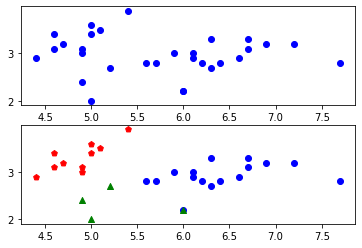

In [76]:
import random
#random.seed(5)
data = np.array([[5.1,3.5,1.4,0.2],[4.9,3.0,1.4,0.2],[4.7,3.2,1.3,0.2],[4.6,3.1,1.5,0.2],[5.0,3.6,1.4,0.2],[5.4,3.9,1.7,0.4],[4.6,3.4,1.4,0.3],
        [5.0,3.4,1.5,0.2],[4.4,2.9,1.4,0.2],[4.9,3.1,1.5,0.1],[5.7,2.8,4.5,1.3],[6.3,3.3,4.7,1.6],[4.9,2.4,3.3,1.0],[6.6,2.9,4.6,1.3],
        [5.2,2.7,3.9,1.4],[5.0,2.0,3.5,1.0],[5.9,3.0,4.2,1.5],[6.0,2.2,4.0,1.0],[6.1,2.9,4.7,1.4],[6.7,3.1,4.4,1.4],[6.0,2.2,5.0,1.5],
        [6.9,3.2,5.7,2.3],[5.6,2.8,4.9,2.0],[7.7,2.8,6.7,2.0],[6.3,2.7,4.9,1.8],[6.7,3.3,5.7,2.1],[7.2,3.2,6.0,1.8],[6.2,2.8,4.8,1.8],
        [6.1,3.0,4.9,1.8],[6.4,2.8,5.6,2.1]])
k_means_test = K_Means(data, 3)
result = k_means_test.claster() 
k_means_test.plot_result()

In [54]:

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(data)
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2], dtype=int32)

[{7}, {4}, {6}]
第1个聚类中心
[4.25 6.  ]
第2个聚类中心
[3.2 2.6]
第3个聚类中心
[6. 4.]
显示K-Means聚类结果和每个聚类中含的样本: 

显示每个样本的特征及类号:

0-th sample:
[1 2]
its classno: 1 

1-th sample:
[3 7]
its classno: 0 

2-th sample:
[3 2]
its classno: 1 

3-th sample:
[2 1]
its classno: 1 

4-th sample:
[5 4]
its classno: 1 

5-th sample:
[4 7]
its classno: 0 

6-th sample:
[6 4]
its classno: 2 

7-th sample:
[5 5]
its classno: 0 



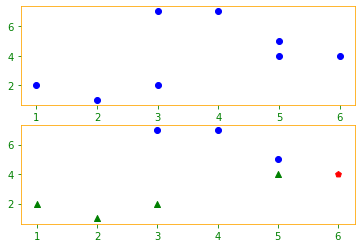

In [16]:
data4 = np.array([[1,3,3,2,5,4,6,5],
                  [2,7,2,1,4,7,4,5]])
data4 =data4.T
k_means_test = K_Means(data4, 3)
result = k_means_test.claster() 
k_means_test.plot_result()

[{58}, {11}, {29}]
第1个聚类中心
[-5.32087052 -4.96962622]
第2个聚类中心
[-0.01396143 -0.14556919]
第3个聚类中心
[4.92583212 4.9810878 ]
显示K-Means聚类结果和每个聚类中含的样本: 

显示每个样本的特征及类号:

0-th sample:
[-0.67977314 -0.58938816]
its classno: 1 

1-th sample:
[-0.36225653 -1.06339055]
its classno: 1 

2-th sample:
[ 1.04523593 -2.23780964]
its classno: 1 

3-th sample:
[0.44081676 0.03067569]
its classno: 1 

4-th sample:
[0.8330426  0.16201157]
its classno: 1 

5-th sample:
[-0.78614894 -0.88914706]
its classno: 1 

6-th sample:
[-0.84795168 -2.56752012]
its classno: 1 

7-th sample:
[0.41469953 0.00415707]
its classno: 1 

8-th sample:
[-1.3135753   0.35311164]
its classno: 1 

9-th sample:
[1.87249264 0.2845829 ]
its classno: 1 

10-th sample:
[-0.06010872  0.98537352]
its classno: 1 

11-th sample:
[-0.42481026  0.84088878]
its classno: 1 

12-th sample:
[ 0.38922845 -0.67271542]
its classno: 1 

13-th sample:
[-0.49107171 -0.08858365]
its classno: 1 

14-th sample:
[-1.19077721  0.07778389]
its classno: 1 

15

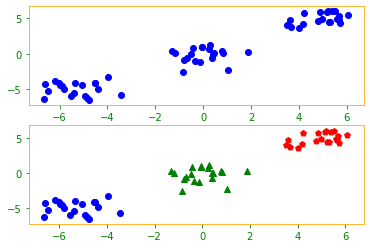

In [23]:
mean = (1, 2)
cov = [[1, 0], [0, 1]]
a1 = np.random.multivariate_normal((0,0), cov, 20, 'raise')
a2 = np.random.multivariate_normal((5,5), cov, 20, 'raise')
a3 = np.random.multivariate_normal((-5,-5), cov, 20, 'raise')
data5 = np.concatenate((a1,a2,a3))
data5
k_means_test = K_Means(data5, 3)
result = k_means_test.claster() 
k_means_test.plot_result()

In [18]:
pattern_df = pd.DataFrame(pattern)
pattern_df['v'] = [x[0] for x in pattern_df['feature']]
pattern_df['h'] = [x[1] for x in pattern_df['feature']]
pattern_df

,feature,classno,v,h
0,"[170, 68]",1,170,68
1,"[180, 71]",1,180,71
2,"[190, 73]",1,190,73
3,"[150, 66]",1,150,66
4,"[190, 68]",1,190,68
5,"[210, 76]",1,210,76
6,"[170, 75]",1,170,75
7,"[140, 62]",2,140,62
8,"[150, 66]",2,150,66
9,"[130, 66]",2,130,66


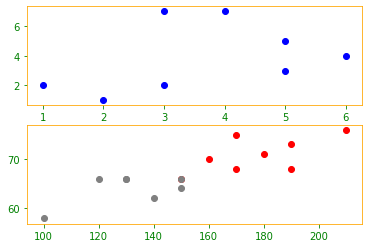

In [19]:
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})
plt.subplot(2,  1,  1) 
plt.scatter([x[0] for x in sample],[x[1] for x in sample], color = 'blue')
plt.subplot(2,  1,  2)
plt.scatter(pattern_df[pattern_df.classno == 0]['v'],pattern_df[pattern_df.classno == 0]['h'], color = 'blue')
plt.scatter(pattern_df[pattern_df.classno == 1]['v'],pattern_df[pattern_df.classno == 1]['h'], color = 'red')
plt.scatter(pattern_df[pattern_df.classno == 2]['v'],pattern_df[pattern_df.classno == 2]['h'], color = 'grey')
plt.show()

### 1.3 KNN

1）计算测试数据与各个训练数据之间的距离；

2）按照距离的递增关系进行排序；

3）选取距离最小的K个点；

4）确定前K个点所在类别的出现频率；

5）返回前K个点中出现频率最高的类别作为测试数据的预测分类。

In [20]:
import operator
predict_label=[]
def createDataSet():
    group = np.array(np.random.normal(3,5,200)).reshape(100,2)
    labels = np.where(np.array(np.random.randint(0,2,100)),'A','B')
    return group,labels

def distance(X1, X2,types = 'Euclidean'):
        # 欧式距离 Euclidean Distance
    if types == 'Euclidean':
        X1 = np.array(X1)
        X2 = np.array(X2)
        distance = np.sqrt(np.dot( (X1 - X2).T, (X1 - X2) ))
    return distance
def getClosest(train_set, train_label, x, topK):
    '''
    train_set : 训练样本数据
    train_label : 训练集标签
    x : 当前训练样本
    topK : 选择topK个邻近点作为参考
    '''
    distList = [0] * len(train_label)
    for i in range(len(train_set)):
        x1 = train_set[i]
        curDist = distance(x1,x)
        distList[i] = curDist
    Dis = np.argsort(-np.array(distList))
    classCount = {}
    for i in range(topK):
        voteclass = train_label[Dis[i]]
        classCount[voteclass] = classCount.get(voteclass,0)+1
    return sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)[0][0]
# 关于 operator  https://docs.python.org/zh-cn/3/library/operator.html
def model_test(train_Data, train_label, test_Data, topK):
    errorCnt = 0
    for i in range(len(test_Data)):
        print('test %d:%d'%(i,len(train_Data)))
        x = test_Data[i]
        y = getClosest(train_Data, train_label, x, topK)
        predict_label.append(y)
    #    if y != test_label[i]:
    #        errorCnt += 1
    #return 1 - (errorCnt / len(test_Data))

In [21]:
predict_label=[]
train_Data,train_label = createDataSet()
test_Data =np.random.normal(5,3,(10,2))
model_test(train_Data, train_label, test_Data, 5)
print(predict_label)

test 0:100
test 1:100
test 2:100
test 3:100
test 4:100
test 5:100
test 6:100
test 7:100
test 8:100
test 9:100
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


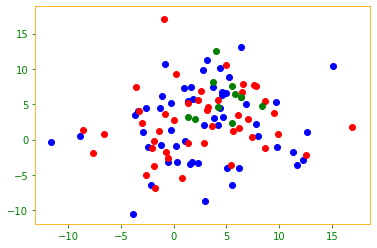

In [22]:
train_Datak = np.array(train_Data).T
test_Datak = np.array(test_Data).T
df3 = pd.DataFrame({
        'x':train_Datak[0],
        'y':train_Datak[1],
        'label':train_label
})
df4 = pd.DataFrame({
    'x': test_Datak[0],
    'y': test_Datak[1],
    'label':predict_label
})
#训练集
plt.scatter(df3[df3.label == 'A']['x'],df3[df3.label == 'A']['y'], color = 'blue')
plt.scatter(df3[df3.label == 'B']['x'],df3[df3.label == 'B']['y'], color = 'red')
# 测试集
plt.scatter(df4[df4.label == 'A']['x'],df4[df4.label == 'A']['y'], color = 'green')
plt.scatter(df4[df4.label == 'B']['x'],df4[df4.label == 'B']['y'], color = 'grey')
plt.show()